### Importaci√≥n de datos



In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [13]:
# Unir los datos de las 4 tiendas
import pandas as pd

datos_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Crear una nueva columna "Precio total" sumando el precio y el costo de env√≠o
datos_tiendas['Precio total'] = datos_tiendas['Precio'] + datos_tiendas['Costo de env√≠o']

# Calcular la facturaci√≥n total (suma de todos los precios totales)
facturacion_total = datos_tiendas['Precio total'].sum()

# Mostrar la facturaci√≥n total
print(f"La facturaci√≥n total de todas las tiendas es: ${facturacion_total:,.2f}")

La facturaci√≥n total de todas las tiendas es: $4,638,316,200.00


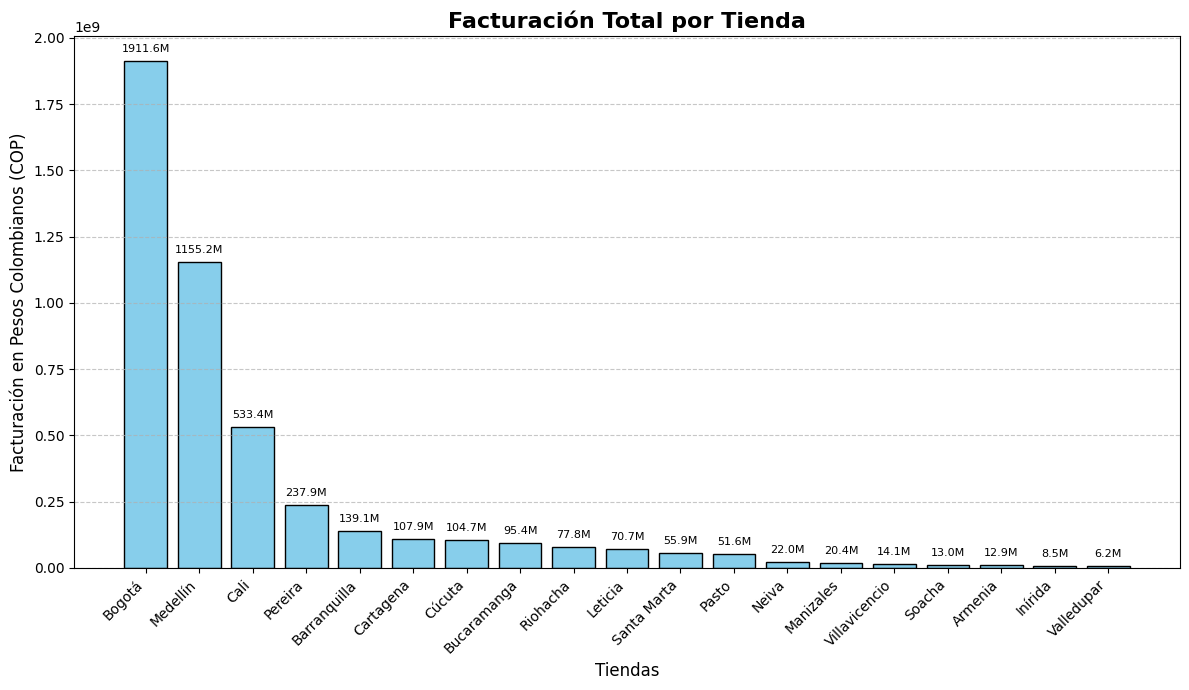

In [14]:
import matplotlib.pyplot as plt

# Agrupar facturaci√≥n por tienda
facturacion_por_tienda = datos_tiendas.groupby('Lugar de Compra')['Precio total'].sum().sort_values(ascending=False)

# Crear un gr√°fico de barras mejorado
fig, ax = plt.subplots(figsize=(12,7))

# Dibujar el gr√°fico
bars = ax.bar(facturacion_por_tienda.index, facturacion_por_tienda.values, color='skyblue', edgecolor='black')

# T√≠tulos y etiquetas claras
plt.title('Facturaci√≥n Total por Tienda', fontsize=16, fontweight='bold')
plt.ylabel('Facturaci√≥n en Pesos Colombianos (COP)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# A√±adir los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height/1e6:.1f}M',  # Mostrar en millones
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 puntos arriba
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8, color='black')

# Ajustar margen para que no se corte nada
plt.tight_layout()

# Mostrar
plt.show()



# 2. Ventas por categor√≠a

In [16]:
# Agrupar por categor√≠a (conteo de productos)
ventas_categoria = df_total['Categor√≠a del Producto'].value_counts()

# Mostrar el resultado
print("Ventas por Categor√≠a:")
print(ventas_categoria)


Ventas por Categor√≠a:
Categor√≠a del Producto
Muebles                    1886
Electr√≥nicos               1772
Juguetes                   1290
Electrodom√©sticos          1149
Deportes y diversi√≥n       1113
Instrumentos musicales      753
Libros                      742
Art√≠culos para el hogar     730
Name: count, dtype: int64


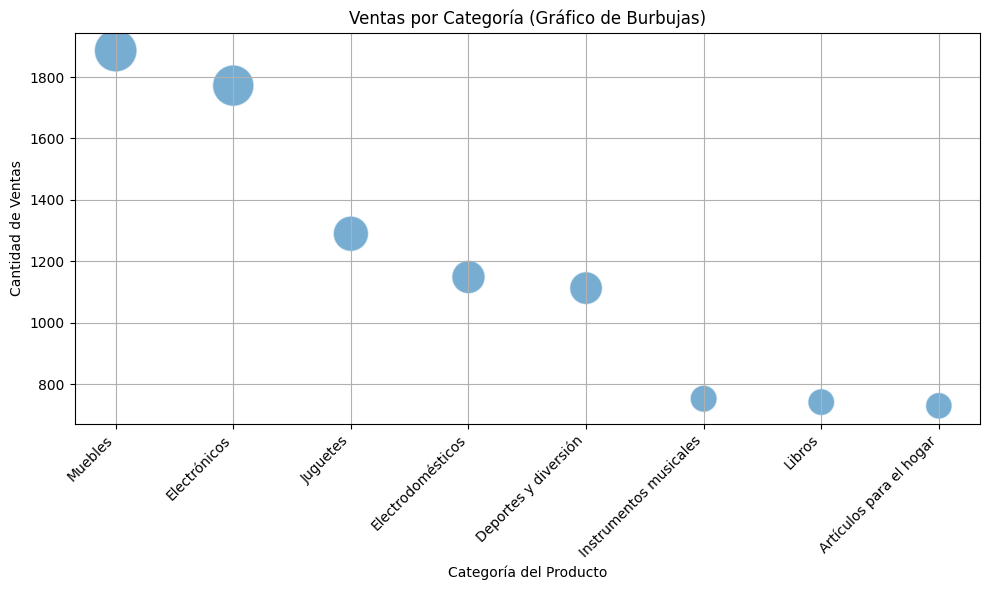

In [17]:
import matplotlib.pyplot as plt

# Convertimos el resultado a DataFrame para graficar
df_burbujas = ventas_categoria.reset_index()
df_burbujas.columns = ['Categor√≠a', 'Cantidad']

# Crear gr√°fico de burbujas
plt.figure(figsize=(10, 6))
plt.scatter(df_burbujas['Categor√≠a'], df_burbujas['Cantidad'],
            s=df_burbujas['Cantidad'] * 0.5,  # tama√±o de la burbuja proporcional a la cantidad
            alpha=0.6, edgecolors='w')

# Mejorar presentaci√≥n
plt.xticks(rotation=45, ha='right')
plt.title('Ventas por Categor√≠a (Gr√°fico de Burbujas)')
plt.xlabel('Categor√≠a del Producto')
plt.ylabel('Cantidad de Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Calificaci√≥n promedio de la tienda


In [ ]:
# Calcular la calificaci√≥n promedio por tienda (lugar de compra)
calificacion_promedio = datos_tiendas.groupby('Lugar de Compra')['Calificaci√≥n'].mean().sort_values(ascending=False)

# Mostrar resultados
print(calificacion_promedio)


Lugar de Compra
Pasto            4.148936
Bogot√°           4.113619
Valledupar       4.071429
Cali             4.046673
Cartagena        4.020661
Pereira          4.013540
Bucaramanga      3.977901
C√∫cuta           3.940860
Medell√≠n         3.926534
Leticia          3.922535
Riohacha         3.895706
Soacha           3.894737
Villavicencio    3.827586
Barranquilla     3.803226
Neiva            3.800000
In√≠rida          3.642857
Manizales        3.634146
Santa Marta      3.596026
Armenia          3.464286
Name: Calificaci√≥n, dtype: float64


<ipython-input-18-2362de61b632>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=datos_tiendas, x='Lugar de Compra', y='Calificaci√≥n', palette="Pastel1")


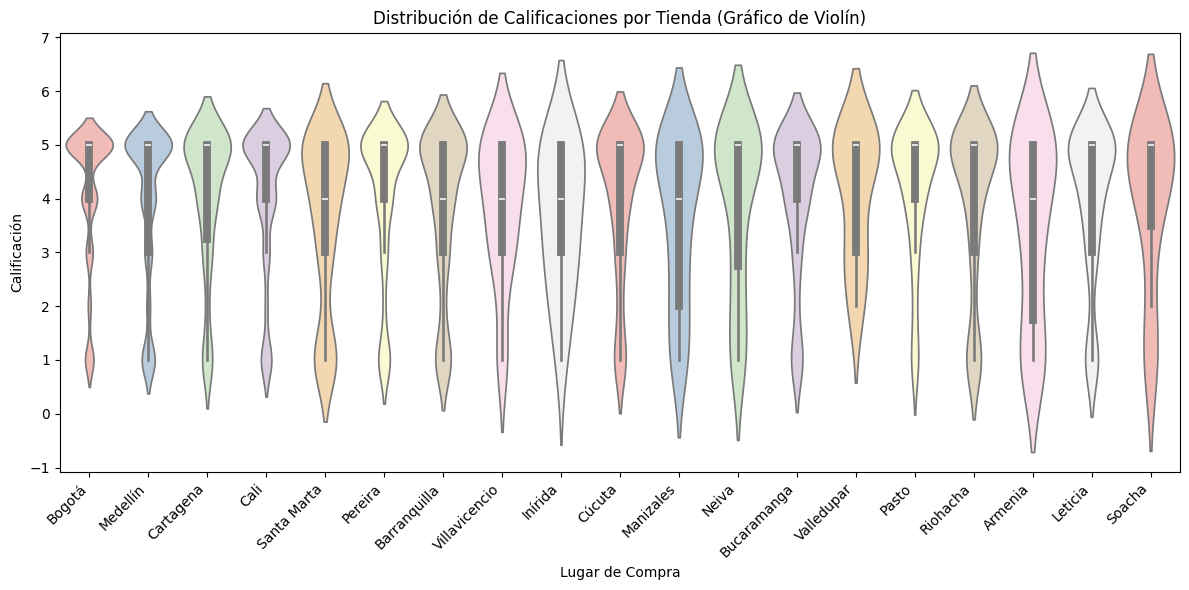

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gr√°fico de viol√≠n (requiere todos los datos, no solo el promedio)
plt.figure(figsize=(12, 6))
sns.violinplot(data=datos_tiendas, x='Lugar de Compra', y='Calificaci√≥n', palette="Pastel1")
plt.xticks(rotation=45, ha='right')
plt.title('Distribuci√≥n de Calificaciones por Tienda (Gr√°fico de Viol√≠n)')
plt.xlabel('Lugar de Compra')
plt.ylabel('Calificaci√≥n')
plt.tight_layout()
plt.show()


# 4. Productos m√°s y menos vendidos

In [ ]:
# Contar cu√°ntas veces se vendi√≥ cada producto
ventas_productos = datos_tiendas['Producto'].value_counts()

# Producto m√°s vendido
producto_mas_vendido = ventas_productos.idxmax()
cantidad_mas_vendido = ventas_productos.max()

# Producto menos vendido
producto_menos_vendido = ventas_productos.idxmin()
cantidad_menos_vendido = ventas_productos.min()

# Mostrar resultados
print(f"üîù Producto m√°s vendido: {producto_mas_vendido} (vendido {cantidad_mas_vendido} veces)")
print(f"üîª Producto menos vendido: {producto_menos_vendido} (vendido {cantidad_menos_vendido} veces)")


üîù Producto m√°s vendido: Mesa de noche (vendido 210 veces)
üîª Producto menos vendido: Celular ABXY (vendido 157 veces)


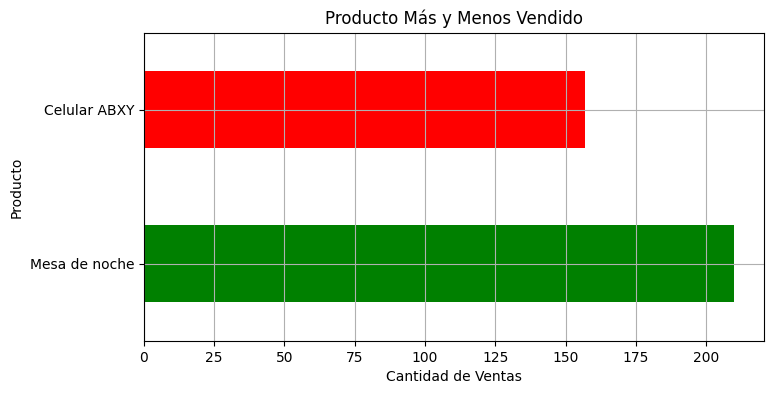

In [ ]:
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame solo con el m√°s y el menos vendido
productos_extremos = pd.Series({
    producto_mas_vendido: cantidad_mas_vendido,
    producto_menos_vendido: cantidad_menos_vendido
})

# Crear gr√°fico
productos_extremos.plot(kind='barh', figsize=(8,4), color=['green', 'red'])
plt.title('Producto M√°s y Menos Vendido')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Producto')
plt.grid(True)
plt.show()



# 5. Env√≠o promedio por tienda

In [ ]:
# Calcular el costo de env√≠o promedio por tienda
envio_promedio = datos_tiendas.groupby('Lugar de Compra')['Costo de env√≠o'].mean().sort_values(ascending=False)

# Mostrar resultados
print(envio_promedio)


Lugar de Compra
Soacha           34768.421053
In√≠rida          30557.142857
C√∫cuta           28597.311828
Pasto            27801.063830
Neiva            27710.000000
Bucaramanga      26790.055249
Cali             26726.812314
Leticia          25317.605634
Medell√≠n         25282.022472
Villavicencio    25100.000000
Manizales        24948.780488
Bogot√°           24532.082171
Riohacha         24127.607362
Pereira          23211.411992
Armenia          22867.857143
Barranquilla     22692.258065
Cartagena        22638.429752
Valledupar       22021.428571
Santa Marta      18752.317881
Name: Costo de env√≠o, dtype: float64


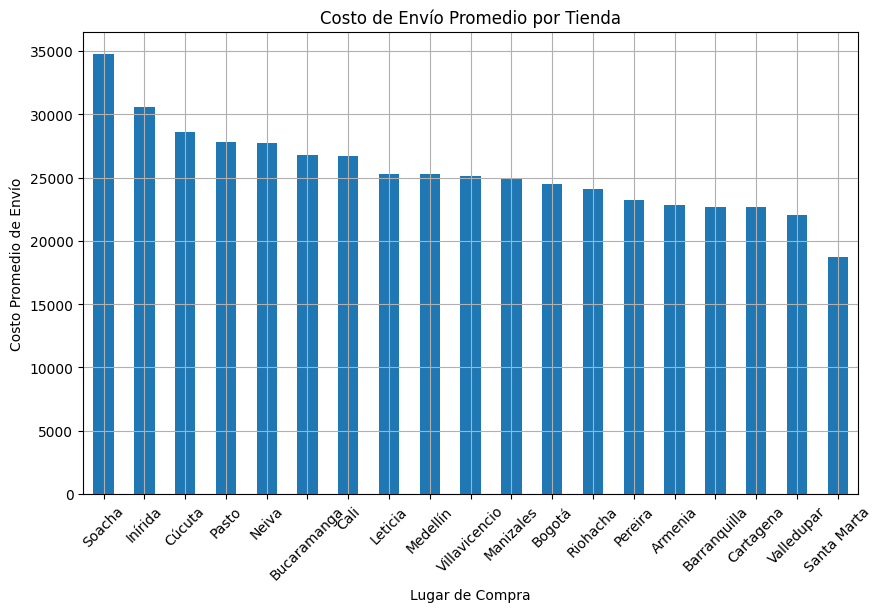

In [ ]:
import matplotlib.pyplot as plt

# Crear gr√°fico de barras
envio_promedio.plot(kind='bar', figsize=(10,6))
plt.title('Costo de Env√≠o Promedio por Tienda')
plt.ylabel('Costo Promedio de Env√≠o')
plt.xlabel('Lugar de Compra')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
